# Modelo computacional para holografía digital de un solo disparo usando efecto Talbot fraccional




*** Author: Joaquin Orozco ***

*Basado en el artículo*

L. Martínez-León, M. Araiza-E, B. Javidi, P. Andrés, V. Climent, J. Lancis, and E. Tajahuerce,  "Single-shot digital holography by use of the fractional Talbot effect" , Opt. Express  17, 12900-12909 (2009). 

**Resumen**

Presentamos un método para grabar hologramas digitales de un solo disparo en línea basado en el efecto Talbot fraccional. En nuestro sistema, un sensor de imagen registra la interferencia entre el campo de luz dispersado por el objeto y un haz de referencia paralelo debidamente codificado. Se utiliza una rejilla periódica bidimensional binaria simple para codificar el haz de referencia generando una distribución de fase periódica de tres pasos sobre el plano del sensor mediante el efecto Talbot fraccional. Esto proporciona un método para realizar interferometría de desplazamiento de fase de disparo único a velocidades de cuadro que solo están limitadas por las capacidades del sensor. Nuestra técnica está bien adaptada para aplicaciones de detección dinámica de frente de onda. Las imágenes del objeto se reconstruyen digitalmente a partir del holograma digital.


**Objetivo General**

Modelar el principio de funcionanamiento de la holografía digital de un solo disparo usando efecto Talbot fraccional

**Objetivos Específicos**



*   Explicar el fenómeno de formación del holograma.

*    Escribir un algoritmo que permita simular el modelo matemático formulado por los autores.



# Modelo

El sistema holográfico digital Talbot se basa en un interferómetro Mach-Zehnder (Fig. 1) con una rejilla de amplitud binaria 2D que codifica el haz de referencia.

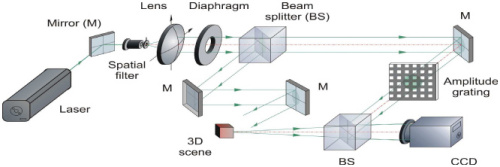

**Fig 1. Sistema óptico para la grabación de hologramas digitales por efecto Talbot fraccional.**

 La distribución de amplitud compleja, $O( x , y , z )$, del campo de luz difractado por el objeto en una ubicación $( x , y ,z )$ es la superposición de las ondas esféricas emitidas por diferentes puntos del objeto de entrada. Escribamos la amplitud compleja en el plano del CCD, ubicado en $z = 0$, de la siguiente forma:

$O(x,y,0)=A_{O}(x,y)e^{ j \phi _{O}(x,y)}$

donde $A_O ( x , y )$ y $ϕ_O ( x , y )$ denotan la amplitud y fase del campo de luz difractada. Nuestro objetivo es medir ambos parámetros para poder reconstruir la distribución de amplitud compleja $O ( x , y , z )$ a diferentes distancias $z$ .

La transmitancia de amplitud $t ( x , y )$ de la rejilla se puede escribir de la siguiente manera:

$t(x,y)=t_{c}(x,y) \bigotimes  \left [ \sum_{j=-\frac{P}{2}}^{\frac{P}{2}-1} \sum_{k=-\frac{P}{2}}^{\frac{P}{2}-1} \delta (x-jL) \delta (y-kL)  \right ]$

donde $t_c ( x , y )$ es la transmitancia de amplitud de la celda unitaria, $d$ es el período de la matriz, $P$ es el número de períodos, $j$ y $k$ son números enteros.

Para obtener una imagen de Fresnel con irradiancia uniforme, la transmitancia de amplitud, $t_c ( x , y )$, de la celda unitaria de la rejilla debe ser dado por:

$t_c=rect(\frac{x}{d/2},\frac{y}{d/2})$



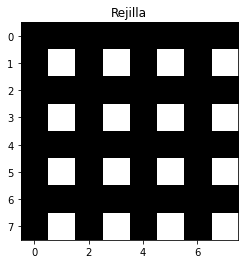

In [ ]:
#Modelar la rejilla 2D
import numpy as np
import matplotlib.pyplot as plt


#Extension de la rejilla [P]ixeles
P=1024

#Tamaño del [p0]ixel en el plano de entrada
p0=9 #um

#Hacer rejilla
## Auxiliar ##
x = np.arange(0, P*p0, p0)
y = np.arange(0, P*p0, p0)
xx, yy = np.meshgrid(x, y, sparse=True)
z1 = np.cos(2*np.pi*xx/18+yy*0) #d=18 um
z2 = np.cos(2*np.pi*yy/18+xx*0)
z11 = (z1<=0)*1
z22 = (z2<=0)*1
## Dibujar rejilla 2D
rejilla_2D= np.multiply(z11,z22)
plt.title("Rejilla")
plt.gray()
plt.imsave('rejilla_2D.png', rejilla_2D) #Guardar imagen
plt.imshow(rejilla_2D[0:8,0:8], cmap='gray') #Mostrar 8-1 pixeles


# Efecto Talbot rejilla 1D

Ilustramos el fenómeno de Autoimagenes, para una rejilla 1D, modelamos la propagación de un haz desde un plano $U_0(x_0,y_0,0)=1*t(x_0,y_0)$

iluminando con una onda plana la trasmitancia:

$t(x_0,y_0)=\frac{1}{2}(1+m\cos(\frac{2\pi x_o}{d}))$

Es la función de trasmisión compleja de la rejilla de periodo d.

A las longitudes de talbol $z_t=2n\frac{d^2}{\lambda}$ encontramos autoimágenes de la trasmitancia $t$.

Vamos a simular la propagación mediante espectro angular.

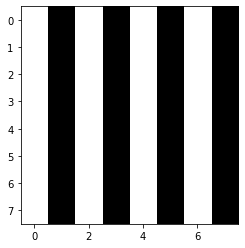

In [ ]:
#Modelar la rejilla 1D
import numpy as np
import matplotlib.pyplot as plt

#Extension de la rejilla [P]ixeles
P=1024

#Tamaño del [p0]ixel en el plano de entrada
p0=9 #um
# Factor de contraste 0<=m<=1 
m=1
#hacer rejilla
## Auxiliar ## 
x = np.arange(-P*p0/2, P*p0/2, p0)
y = np.arange(-P*p0/2, P*p0/2, p0)
xx, yy = np.meshgrid(x, y, sparse=True)
#Dibujar rejilla 1D
d=18 #um
rejilla_1D = 1/2*(1+m*np.cos(2*np.pi*xx/d+0*yy)) 

plt.gray()
plt.imsave('rejilla_1D.png', rejilla_1D) #Guardar imagen
plt.imshow(rejilla_1D[0:8,0:8], cmap='gray') #Mostrar 100-1 pixeles


# Espectro angular

Modelamos la propagación  del campo $U(u ,v ,0)$ hasta una distancia $z$ como:

$ U(x,y,z)\propto  DFT^{-1} \left \{ DFT\left \{ U(u,v,0)  \right \} * exp(jkz\sqrt{1-\lambda ^{2} \left ( {f_{x}}^{2} + {f_{y}}^{2} \right )} \right \} $

Donde:

$\Delta f_{x} \Delta x = \frac{1}{M}$

$\Delta f_{y} \Delta y = \frac{1}{M}$

Donde $\Delta x$ y $\Delta y$, y $\Delta f_x$, $\Delta f_y$ son los tamaños de pixel, en el plano de salida, y frecuencias espaciales, respectivamente.


---


Raul Castañeda, Wilmer Toro, Jorge Garcia-Sucerquia, Evaluation of the limits of application for numerical diffraction methods based on basic optics concepts, Optik, Volume 126, Issue 24, (2015)

In [ ]:
import numpy as np
#Función para la propagación angular_spectrum
def angular_spectrum(campo_entrada=None, long_onda=None, z=None, p_in=None ,P_in=1024, P_out=1024):
  k=2*np.pi/long_onda
  p_in=1/(P_in*p_in)
  u = np.arange(-P_in*p_in/2, P_in*p_in/2, p_in)
  v = np.arange(-P_in*p_in/2, P_in*p_in/2, p_in)
  uu, vv = np.meshgrid(u, v, sparse=True)
  F1= np.fft.fft2(campo_entrada)*np.exp(1j*k*z*np.sqrt(1-(long_onda**2)*((uu)**2+(vv)**2)))
  F2= np.fft.ifft2(F1)
  return F2

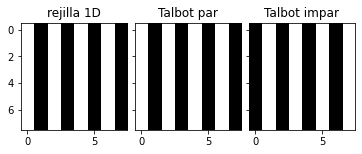

In [ ]:
# Calculasmos z_t para la rejilla 1D
long_onda=0.5 #500 nm
d= 18 #um
z_t2= d**2/long_onda #z_t/2
n = 1 #n entero

talbot_par = angular_spectrum(campo_entrada=rejilla_1D, long_onda=long_onda,z=2*n*z_t2, p_in=9)

talbot_impar = angular_spectrum(campo_entrada=rejilla_1D, long_onda=long_onda,z=(2*n+1)*z_t2, p_in=9)

I1=(np.absolute(talbot_par))**2
I2=(np.absolute(talbot_impar))**2

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure()
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im, titulo in zip(grid, [rejilla_1D[0:8,0:8], I1[0:8,0:8], I2[0:8,0:8]], ["Rejilla 1D", "Talbot par", "Talbot impar"]):
    # Iterating over the grid returns the Axes.
    ax.set_title(titulo)
    ax.imshow(im)

plt.show()



# Efecto Talbot rejilla 2D

Propagamos mediante el algoritmo de espectro angular.
 

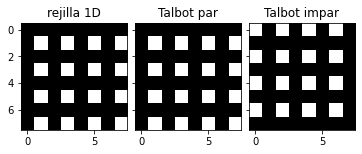

In [ ]:
# Calculasmos z_t para la rejilla 1D
long_onda=0.514 #514 nm
d=18 #um
z_t2= d**2/long_onda #z_t/2
n = 1 #n entero

talbot_par = angular_spectrum(campo_entrada=rejilla_2D, long_onda=long_onda,z=2*n*z_t2, p_in=p0)

talbot_impar = angular_spectrum(campo_entrada=rejilla_2D, long_onda=long_onda,z=(2*n+1)*z_t2, p_in=p0)

I1=(np.absolute(talbot_par))**2
I2=(np.absolute(talbot_impar))**2

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure()
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im, titulo in zip(grid, [rejilla_2D[0:8,0:8], I1[0:8,0:8], I2[0:8,0:8]], ["Rejilla 2D", "Talbot par", "Talbot impar"]):
    # Iterating over the grid returns the Axes.
    ax.set_title(titulo)
    ax.imshow(im)


# Imágenes de Fresnel

Dado que $t ( x , y )$ es una función periódica, la distribución de amplitud asociada con la rejilla produce imágenes propias por propagación en el espacio libre, es decir, patrones de difracción que son una copia de la distribución de entrada, pero también imágenes de Fresnel, como se muestra. en la Fig 2.

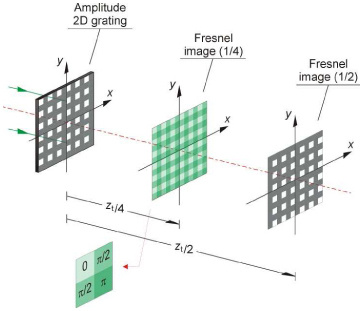

**Fig 2.  Diagrama esquemático de la distribución de fase en el plano de Talbot de 1/4 fraccional proporcionado por una rejilla 2D de amplitud y la distribución de irradiancia correspondiente en el plano de Talbot de 1/2. La celda unitaria ampliada muestra las diferentes fases obtenidas en la imagen de 1/4 Fresnel**

Bajo iluminación monocromática, las imágenes de Fresnel se obtienen a distancias.

${z}'= \frac{2d^{2}}{\lambda }\left ( q+\frac{n}{m} \right )= z_t \left ( q+\frac{n}{m} \right )$

donde $q,n,m$ son enteros tal que $n$ y $m$ no tienen factores en común y $n < m $.

Se puede mostrar que el campo R(x,y,0), que llega al detector luego de recorrer una distancia $z={z}'$ con $\frac{n}{m}=\frac{1}{4}$ y $q$ arbitario, es igual a:

$R(x,y,0)=\frac{A}{2}\left ( t(x,y) + j t(x+\frac{d}{2},y)+it(x,y+\frac{d}{2}) +j^{2}t(x+\frac{d}{2},y+\frac{d}{2}) \right )$

donde $d$ es la extensión de la función $rect$.


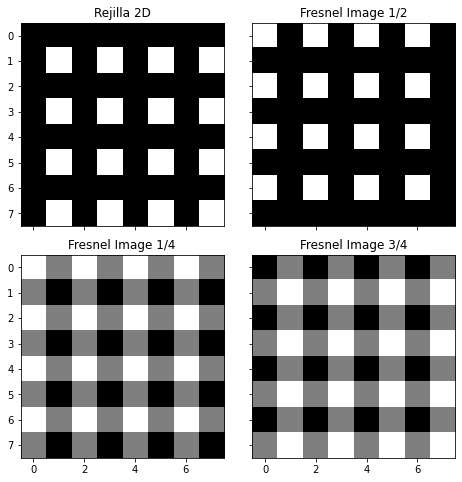

In [ ]:
#Simulando la Fig 2. para la rejilla 2D

# Calculasmos z_t para la rejilla 1D
long_onda=0.514 #514 nm
d=18 #um
z_t2= d**2/long_onda #z_t/2
n = 1 #n entero

fresnel_im12 = angular_spectrum(campo_entrada=rejilla_2D, long_onda=long_onda,z=z_t2, p_in=p0)#Fresnel Image 1/2

fresnel_im14 = angular_spectrum(campo_entrada=rejilla_2D, long_onda=long_onda,z=z_t2/2, p_in=p0)#Fresnel Image 1/4

fresnel_im34 = angular_spectrum(campo_entrada=rejilla_2D, long_onda=long_onda,z=3*z_t2/2, p_in=p0)#Fresnel Image 3/4

I1=(np.absolute(fresnel_im12))**2
I2=(np.absolute(fresnel_im14))**2
I3=(np.absolute(fresnel_im34))**2

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(8.,8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.4,  # pad between axes in inch.
                 )

for ax, im, titulo in zip(grid, [rejilla_2D[0:8,0:8], I1[0:8,0:8], I2[0:8,0:8], I3[0:8,0:8]], ["Rejilla 2D", "Fresnel Image 1/2", "Fresnel Image 1/4","Fresnel Image 3/4" ]):
    # Iterating over the grid returns the Axes.
    ax.set_title(titulo)
    ax.imshow(im)


# Campo en el CCD $O(x,y,0)$

El campo en el detector resulta de la suma de las señales de referencia y el campo dispersado por el objeto de análisis.

$O(x,y,0)$ es el campo que llega al detector desde el Objeto.

Se puede demostrar que, el campo complejo generado por el haz del objeto en el plano de salida, nuestro holograma digital, se puede escribir como:

$O(x,y,0)=\frac{1}{4} \left \{  I(x,y,0) -  I(x,y,\pi)+j\left [ 2I(x,y,\frac{\pi }{2})- I(x,y,0) - I(x,y,\pi) \right ]  \right \} $

Para este caso usaremos imágenes de objetos 2D propagadas a distintas distancias z, y luego la recuperaremos con los dos algoritmos descritos por los autores.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


**1. Interpolación para obtener interferogramas de igual dimensión que el detector**

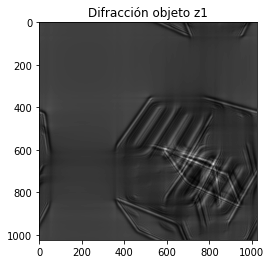

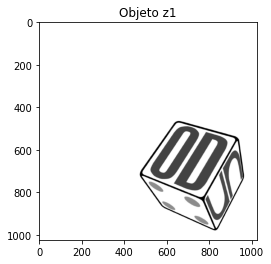

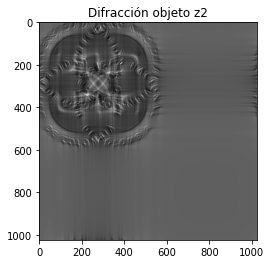

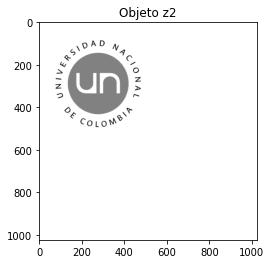

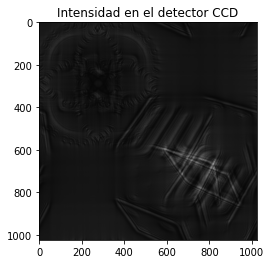

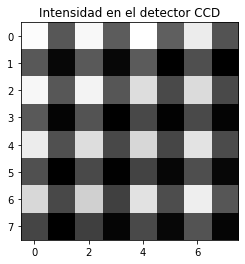

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## z1

objeto_z1 = np.array(plt.imread('/content/drive/MyDrive/Optical_Instruments/z1.jpg'))
objeto_z1 = objeto_z1/255

Occd_z1= angular_spectrum(campo_entrada=objeto_z1[:,:,0], long_onda=0.514 ,z=40000 , p_in=9)

I_Occd_z1=(np.absolute(Occd_z1))**2

## z2

objeto_z2 = np.array(plt.imread('/content/drive/MyDrive/Optical_Instruments/z2.jpg'))
objeto_z2 = objeto_z2/255

Occd_z2= angular_spectrum(campo_entrada=objeto_z2[:,:,0], long_onda=0.514 ,z=30000 , p_in=9)

I_Occd_z2=(np.absolute(Occd_z2))**2

## Campo en el dectector

U_ccd = fresnel_im14 + Occd_z1 + Occd_z2

I_ccd=(np.absolute(U_ccd))**2



plt.title("Difracción objeto z1")
plt.imshow(I_Occd_z1, cmap='gray')
plt.show()
plt.title("Objeto z1")
plt.imshow(objeto_z1[:,:,0], cmap='gray')
plt.show()
plt.title("Difracción objeto z2")
plt.imshow(I_Occd_z2, cmap='gray')
plt.show()
plt.title("Objeto z2")
plt.imshow(objeto_z2[:,:,0], cmap='gray')
plt.show()
plt.title("Intensidad en el detector CCD")
plt.imshow(I_ccd, cmap='gray')
plt.show()
plt.title("Intensidad en el detector CCD")
plt.imshow(I_ccd[100:108,100:108], cmap='gray')
plt.show()

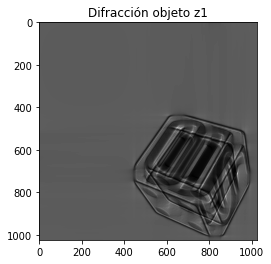

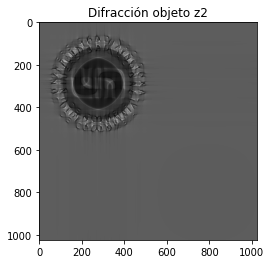

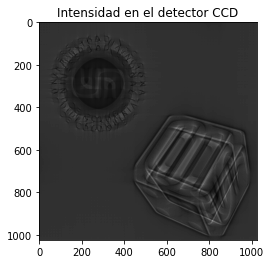

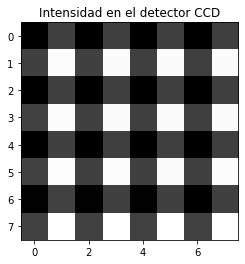

In [ ]:
## z1

objeto_z1 = np.array(plt.imread('/content/drive/MyDrive/Optical_Instruments/z1.jpg'))
objeto_z1 = objeto_z1/255

Occd_z1= angular_spectrum(campo_entrada=objeto_z1[:,:,0], long_onda=0.514 ,z=40000 , p_in=18)

I_Occd_z1=(np.absolute(Occd_z1))**2

## z2

objeto_z2 = np.array(plt.imread('/content/drive/MyDrive/Optical_Instruments/z2.jpg'))
objeto_z2 = objeto_z2/255

Occd_z2= angular_spectrum(campo_entrada=objeto_z2[:,:,0], long_onda=0.514 ,z=30000 , p_in=18)

I_Occd_z2=(np.absolute(Occd_z2))**2

## Campo en el dectector

U_ccd = fresnel_im14 + Occd_z1 + Occd_z2

I_ccd=(np.absolute(U_ccd))**2

plt.title("Difracción objeto z1")
plt.imshow(I_Occd_z1, cmap='gray')
plt.show()
plt.title("Difracción objeto z2")
plt.imshow(I_Occd_z2, cmap='gray')
plt.show()
plt.title("Intensidad en el detector CCD")
plt.imshow(I_ccd, cmap='gray')
plt.show()
plt.title("Intensidad en el detector CCD")
plt.imshow(I_ccd[100:108,100:108], cmap='gray')
plt.show()


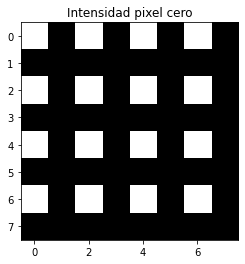

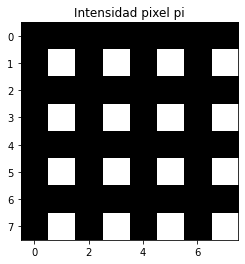

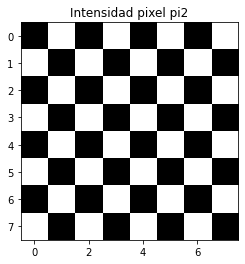

In [ ]:
#recuperamos las intensidades I(x,y,0) ,I(x,y,pi), I(x,y,pi/2)

## Elaboramos mascaras en el detector para cada uno de las señales

mask_0 = (I1 > 0.9) * np.ones((1024,1024)) #señal 0
mask_pi = (rejilla_2D > 0.9) * np.ones((1024,1024)) #señal pi
mask_pi2 = (mask_pi + mask_0 < 1)*1   #señal pi/2
I_0 = I_ccd * mask_0
I_pi = I_ccd * mask_pi
I_pi2 = I_ccd * mask_pi2

plt.title("Intensidad pixel cero")
plt.imshow(I_0[0:8,0:8], cmap='gray')
plt.show()
plt.title("Intensidad pixel pi")
plt.imshow(I_pi[0:8,0:8], cmap='gray')
plt.show()
plt.title("Intensidad pixel pi2")
plt.imshow(I_pi2[0:8,0:8], cmap='gray')
plt.show()

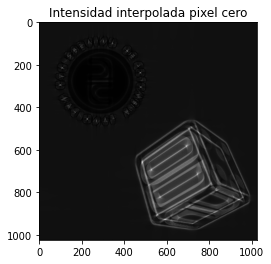

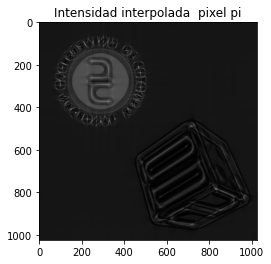

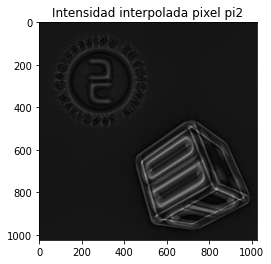

In [ ]:
#Interpolamos las funciones en aquellos puntos donde no hay información

from scipy.interpolate import griddata ##Griddata se usa para interpolar.
#Auxiliar#
xy_0 = np.transpose(np.array(np.nonzero(I_0)))
xy_pi = np.transpose(np.array(np.nonzero(I_pi)))
xy_pi2 = np.transpose(np.array(np.nonzero(I_pi2)))

zI_0 = I_0[I_0 != 0]   #Recuperamos los valores distintos de cero
zI_pi = I_pi[I_pi != 0]
zI_pi2 = I_pi2[I_pi2 != 0]

x = np.arange(0, 1024, 1)
y = np.arange(0, 1024, 1)
xx, yy = np.meshgrid(x, y, sparse=True)

#Intensidades interpoladas

Ixy0=griddata(xy_0,zI_0,(xx,yy), fill_value=0)
Ixypi=griddata(xy_pi,zI_pi,(xx,yy), fill_value=0)
Ixypi2=griddata(xy_pi2,zI_pi2,(xx,yy), fill_value=0)

plt.title("Intensidad interpolada pixel cero")
plt.imshow(Ixy0, cmap='gray')
plt.show()
plt.title("Intensidad interpolada  pixel pi")
plt.imshow(Ixypi, cmap='gray')
plt.show()
plt.title("Intensidad interpolada pixel pi2")
plt.imshow(Ixypi2, cmap='gray')
plt.show()

# Recuperar Campo generado por el objeto $O(x,y,z)$

El holograma digital complejo resultante, O ( x , y, 0) nos permite reconstruir numéricamente la distribución de amplitud compleja, O ( x , y , z ), generada por el objeto 3D en el plano ubicado a una distancia z del sensor. La reconstrucción se puede obtener calculando una integral de Fresnel discreta o, alternativamente, utilizando el método de función de transferencia de propagación.

$O(m,n,z)= DFT^{-1}\left \{ DFT\left \{ O(x,y,0) \right \} \exp(-j \pi \lambda z \left ( \frac{u}{\Delta xN_{x}}^{2} + \frac{v}{\Delta yN_{y}}^{2} \right  ) \right \}$

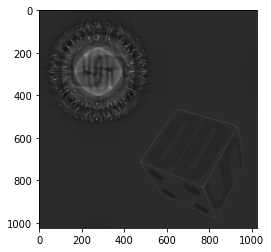

In [ ]:
import numpy as np

#A partir de las intensidades se puede calcular el campo complejo del objeto en el detector Oxy0
Oxy0=np.array(1/4*(Ixy0-Ixypi+1j*(2*Ixypi2-Ixy0-Ixypi)))


#Y con este campo recuperar el campo complejo a distancia z.

Oxyz1= angular_spectrum(campo_entrada=U_ccd, long_onda=0.514 ,z= -40000 , p_in=9)

Ixyz1 = (np.absolute(Oxyz1))**2
plt.imshow(Ixyz1)

plt.imsave('objeto_recuperado.png',Ixyz1 )